In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# parameters of the model
num_alleles = 64
num_genes = 100
mutation_rate = 0.02
num_pop = 200
ratio_survive = 0.8
num_epochs = 100

In [148]:
# fitness matrix for each gene for each allele
F = np.random.randn(num_genes, num_alleles)

In [149]:
# example chromosome: just an array of allele identities for each gene
chromosome = np.random.randint(0, num_alleles, num_genes)
chromosome

array([52, 59, 22, 35, 45, 36,  7,  9,  8, 31, 25, 42, 52, 28,  3, 10, 62,
        8,  2, 21, 51, 62, 27, 41, 61, 21, 46, 43, 30, 54, 62, 59, 47, 31,
        0, 36,  7,  6, 51, 23, 25, 30, 51, 62, 39, 11, 28, 32, 11, 34, 30,
       23,  7,  4, 17, 21, 54, 13, 19, 32, 49, 51,  4, 41, 35, 42,  7, 19,
       49,  8,  7, 32, 59, 17,  8, 54, 51, 23, 12, 58, 25, 13, 44,  7, 48,
       57, 47, 44, 19,  6, 46,  0, 46, 16, 17, 47, 43, 13, 18,  3])

In [180]:
def mutate(ch):
  # randomly mutate some parts of chromosome
  m = np.random.rand(*ch.shape) <= mutation_rate
  return np.where(m, np.random.randint(0, num_alleles, ch.shape), ch)
mutate(chromosome)

array([52, 59, 22, 35, 45, 36,  7,  9,  8, 31, 25, 42, 52, 28,  3, 10, 62,
        8,  2, 21, 51, 62, 27, 41, 61, 21, 46, 43, 30, 54, 62, 59, 47, 31,
        0, 36,  7,  6, 51, 23, 25, 30, 51, 62, 39, 11, 28, 32, 11, 34, 30,
       23,  7,  4, 17, 21, 54, 13, 19, 32, 49, 51,  4, 41, 35, 42,  7, 19,
       49,  8,  7, 15, 59, 17,  8, 54, 51, 23, 12, 58, 25, 13, 44,  7, 48,
       57, 47, 44, 19,  6, 46,  0, 46, 16, 17, 47, 43, 13, 18,  3])

In [181]:
def crossover(ch1, ch2):
  # randomly mix parts of two chromosomes
  m = np.random.rand(*ch1.shape) < 0.5
  return np.where(m, ch1, ch2)
crossover(mutate(chromosome), mutate(chromosome))

array([52, 59, 22, 35, 45, 36,  7,  9,  8, 31, 25, 42, 52, 28,  3, 10, 62,
        8,  2, 21, 51, 62, 27, 41, 61, 21, 46, 43, 30, 54, 62, 59, 47, 31,
        0, 36,  7,  6, 51, 23, 25, 30, 51, 62, 39, 11, 28, 32, 11, 34, 30,
       23,  7,  4, 17, 21, 54, 13, 19, 32, 49, 51,  4, 41, 35, 42,  7, 19,
       49,  8, 63, 32, 59, 17,  8, 54, 51, 23, 12, 58, 25, 13, 44,  7, 48,
       57, 47, 44, 19,  6, 46,  0, 46, 16, 17, 47, 43, 13, 18,  3])

In [187]:
seed_chromosome = np.random.randint(0, num_alleles, (1, num_genes))
pop = mutate(np.repeat(seed_chromosome, num_pop, axis=0))
pop.shape # num_pop x num_genes

(200, 100)

In [194]:
# asexual reproduction model
asexual = []
pop = mutate(np.repeat(seed_chromosome, num_pop, axis=0))
for i in range(num_epochs):
  # eval and log current population fitness
  fit = F[range(num_genes), pop].mean(1)
  asexual.append(float(np.mean(fit)))
  # survive the most fit organisms
  ix = np.argsort(fit)[::-1]
  nsurv = int(ratio_survive * num_pop)
  surv = pop[ix[:nsurv]]
  # reproduce a new generation via mutation of random surviving organisms
  repix = np.random.randint(0, nsurv, num_pop - nsurv)
  children = mutate(pop[repix])
  pop = np.concatenate((surv, children))

In [195]:
# asexual reproduction model
sexual = []
pop = mutate(np.repeat(seed_chromosome, num_pop, axis=0))
for i in range(num_epochs):
  # eval and log current population fitness
  fit = F[range(num_genes), pop].mean(1)
  sexual.append(float(np.mean(fit)))
  # survive the most fit organisms
  ix = np.argsort(fit)[::-1]
  nsurv = int(ratio_survive * num_pop)
  surv = pop[ix[:nsurv]]
  # reproduce a new generation via crossover + mutation of two parents
  repix1 = np.random.randint(0, nsurv, num_pop - nsurv)
  repix2 = np.random.randint(0, nsurv, num_pop - nsurv)
  children = mutate(crossover(pop[repix1], pop[repix2]))
  pop = np.concatenate((surv, children))

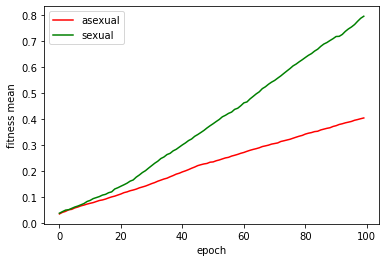

In [196]:
plt.plot(asexual, '-r')
plt.plot(sexual, '-g')
plt.legend(['asexual', 'sexual'])
plt.ylabel('fitness mean')
plt.xlabel('epoch');

In [ ]:
# :O